# Лабораторная работа №1
## Белоцкий Дмитрий 853504
# Построение и исследование характеристик датчиков базовых случайных величин

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Задание 1. Метод середины квадрата

In [10]:
def middleSquareGenerator(num):
    def nextVal(prev, length):
        square = prev * prev
        next = str(square).rjust(length * 2, '0')[(length // 2): (length + length // 2)]
        return int(next)

    length = len(str(num))
    while True:
        yield num / 10 ** length
        num = nextVal(num, length)

In [11]:
def generateValues(num, n):
    gen = middleSquareGenerator(num)
    return [next(gen) for i in range(n)]

def getHist(values, k):
    x, y = list(), list()
    for i in range(k):
        y.append(len(list(filter(lambda x: i / k <= x < (i + 1) / k, values))) / len(values))
        x.append(f'{(i +1 ) / k}')
    return x, y

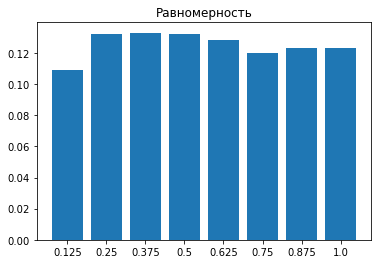

In [13]:
values = np.array(generateValues(26042001, 1000))
x, y = getHist(values, 8)
plt.bar(x, y)
plt.title('Равномерность')
plt.show()

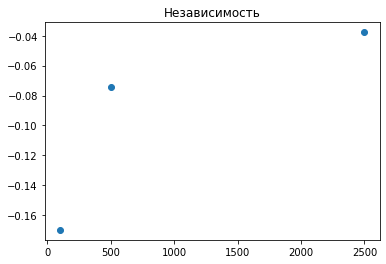

In [7]:
num, length = 26042001, 100
x, y = list(), list()
s = 10
for i in range(3):
    values = np.array(generateValues(num, length))
    v1 = values[s:]
    v2 = values[:(-s)]
    x.append(length)
    y.append(scipy.stats.pearsonr(v1, v2)[0])
    length = length * 5
plt.plot(x, y, 'o')
plt.title('Независимость')
plt.show()

## Задание 2. Мультипликативный конгруэнтный метод

In [5]:
def multiplicativeCongruentGenerator(m, k, a0):
    def nextValue(m, k, prev):
        return (k * prev) % m
    next = a0
    while True:
        yield next / m
        next = nextValue(m, k, next)


def generateValues(m, k, a0, n):
    gen = multiplicativeCongruentGenerator(m, k, a0)
    return [next(gen) for i in range(n)]

In [6]:
m = 131072
k = 131101
a0 = 29

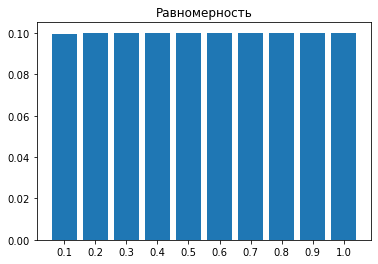

In [7]:
values = np.array(generateValues(m, k, a0, 100000))
x, y = getHist(values, 10)
plt.bar(x, y)
plt.title('Равномерность')
plt.show()

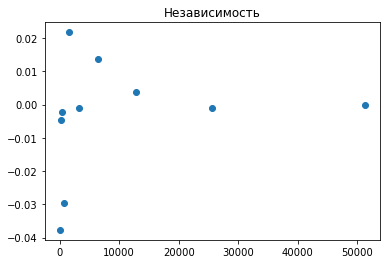

In [8]:
length = 100
x, y = list(), list()
s = 10
for i in range(10):
    values = np.array(generateValues(m, k, a0, length))
    v1 = values[s:]
    v2 = values[:(-s)]
    x.append(length)
    y.append(scipy.stats.pearsonr(v1, v2)[0])
    length = length * 2
plt.plot(x, y, 'o')
plt.title('Независимость')
plt.show()

<b>Вывод</b>: датчик случайной величины, построенный мультипликтаивным конгруэнтным методом оказался более надежным, т.к. коэффициент корреляции при большом наборе данных близок к нулю, что не противоречит тому, что он независим, также по гистограмме видно, что СВ распределена равномера.  Главная сложность данного метода в правильном выборе параметров m и k. Метод середины квадрата имеет существенный недостаток - при генерации большого количества чисел, есть риск получить нули в середине каждого последующего числа.